<a href="https://colab.research.google.com/github/dataqueenpend/Projects-/blob/main/Feature_Selection_And_Model_Building_House_Prices_dataset_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

videos to watch before performing feature selection:
* [Linear Regression Indepth Maths Intuition- Data Science]('https://www.youtube.com/watch?v=1-OGRohmH2s')
* [Machine Learning-Bias And Variance In Depth Intuition| Overfitting Underfitting]('https://www.youtube.com/watch?v=BqzgUnrNhFM')
* [Ridge and Lasso Regression Indepth Intuition- Data Science]('https://www.youtube.com/watch?v=9lRv01HDU0s')
* [Advance House Price Prediction-Feature Selection]('https://www.youtube.com/watch?v=1JXrxCJoHuw&list=PLZoTAELRMXVPQyArDHyQVjQxjj_YmEuO9&index=5')

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
import warnings
warnings.filterwarnings('ignore')



In [88]:
train = pd.read_csv('/content/train_after_fe.csv')
test = pd.read_csv('/content/test_after_fe.csv')

In [89]:
train.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage NaN,MasVnrArea NaN,GarageYrBlt NaN
0,1,12.247694,0.235294,0.75,0.418208,0.366344,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.636364,0.4,1.0,0.75,1.0,0.666667,0.500,0.036765,0.098361,0.0,0.0,1.0,1.0,0.50,0.12250,0.666667,1.0,1.00,0.75,0.75,0.25,1.000000,0.125089,0.833333,0.0,0.064212,0.140098,...,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.0,0.000000,0.2,0.8,0.046729,0.666667,0.50,0.386460,0.666667,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.090909,0.50,0.666667,0.75,0.0,0.0,0.0
1,2,12.109011,0.000000,0.75,0.495064,0.391317,1.0,1.0,0.000000,0.333333,1.0,0.50,0.0,0.500000,0.2,1.0,0.75,0.6,0.555556,0.875,0.227941,0.524590,0.0,0.0,0.4,0.3,0.25,0.00000,0.333333,1.0,0.50,0.75,0.75,1.00,0.666667,0.173281,0.833333,0.0,0.121575,0.206547,...,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,1.0,0.333333,0.6,0.8,0.289720,0.666667,0.50,0.324401,0.666667,1.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.363636,0.25,0.666667,0.75,0.0,0.0,0.0
2,3,12.317167,0.235294,0.75,0.434909,0.422359,1.0,1.0,0.333333,0.333333,1.0,0.00,0.0,0.636364,0.4,1.0,0.75,1.0,0.666667,0.500,0.051471,0.114754,0.0,0.0,1.0,1.0,0.50,0.10125,0.666667,1.0,1.00,0.75,0.75,0.50,1.000000,0.086109,0.833333,0.0,0.185788,0.150573,...,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.333333,0.6,0.8,0.065421,0.666667,0.50,0.428773,0.666667,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.727273,0.50,0.666667,0.75,0.0,0.0,0.0
3,4,11.849398,0.294118,0.75,0.388581,0.390295,1.0,1.0,0.333333,0.333333,1.0,0.25,0.0,0.727273,0.4,1.0,0.75,1.0,0.666667,0.500,0.669118,0.606557,0.0,0.0,0.2,0.4,0.25,0.00000,0.333333,1.0,0.25,0.50,1.00,0.25,0.666667,0.038271,0.833333,0.0,0.231164,0.123732,...,0.399941,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.333333,0.8,0.4,0.074766,0.333333,0.75,0.452750,0.666667,1.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.090909,0.00,0.666667,0.00,0.0,0.0,0.0
4,5,12.429216,0.235294,0.75,0.513123,0.468761,1.0,1.0,0.333333,0.333333,1.0,0.50,0.0,1.000000,0.4,1.0,0.75,1.0,0.777778,0.500,0.058824,0.147541,0.0,0.0,1.0,1.0,0.50,0.21875,0.666667,1.0,1.00,0.75,0.75,0.75,1.000000,0.116052,0.833333,0.0,0.209760,0.187398,...,0.466237,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.0,0.333333,0.6,0.8,0.074766,0.666667,0.75,0.589563,0.666667,1.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.000000,0.50,0.666667,0.75,0.0,0.0,0.0


In [90]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage NaN,MasVnrArea NaN,BsmtFullBath NaN,BsmtHalfBath NaN,GarageYrBlt NaN
0,1461,0.000000,0.50,0.657288,0.614997,1.0,0.5,0.000000,0.333333,1.0,0.50,0.5,0.20,0.166667,0.0,0.75,0.2,0.444444,0.625,0.384615,0.822581,0.0,0.0,0.9,0.909091,0.25,0.000000,0.333333,0.666667,0.0,0.50,0.5,0.25,0.166667,0.116708,0.666667,0.094364,0.126168,0.173111,0.0,...,0.0,0.351478,0.0,0.0,0.25,0.0,0.333333,0.5,0.50,0.166667,0.0,0.00,0.4,0.666667,0.792994,0.333333,0.2,0.490591,0.666667,1.0,1.0,0.098315,0.000000,0.0,0.0,0.208333,0.0,0.0,0.25,1.0,0.000000,0.454545,1.0,0.75,0.75,0.0,0.0,0.0,0.0,0.0
1,1462,0.000000,0.75,0.662397,0.668388,1.0,0.5,0.333333,0.333333,1.0,0.75,0.5,0.20,0.500000,0.0,0.75,0.2,0.555556,0.625,0.407692,0.870968,1.0,0.0,0.4,0.545455,0.50,0.083721,0.333333,0.666667,0.0,0.50,0.5,0.25,0.500000,0.230175,0.833333,0.000000,0.189720,0.260844,0.0,...,0.0,0.512060,0.0,0.0,0.25,0.5,0.500000,0.5,0.75,0.250000,0.0,0.00,0.4,0.666667,0.802548,0.333333,0.2,0.209677,0.666667,1.0,1.0,0.275983,0.048518,0.0,0.0,0.000000,0.0,0.0,1.00,0.0,0.735294,0.454545,1.0,0.75,0.75,0.0,0.0,0.0,0.0,0.0
2,1463,0.235294,0.75,0.624887,0.660362,1.0,0.5,0.333333,0.333333,1.0,0.50,0.5,0.65,0.500000,0.0,0.75,1.0,0.444444,0.500,0.107692,0.225806,0.0,0.0,0.9,0.909091,0.25,0.000000,0.333333,0.666667,1.0,0.75,0.5,0.25,1.000000,0.197257,0.833333,0.000000,0.064019,0.182139,0.0,...,0.0,0.591552,0.0,0.0,0.50,0.5,0.500000,0.5,0.50,0.250000,0.0,0.25,0.6,0.666667,0.678344,1.000000,0.4,0.323925,0.666667,1.0,1.0,0.148876,0.045822,0.0,0.0,0.000000,0.0,0.0,0.25,1.0,0.000000,0.181818,1.0,0.75,0.75,0.0,0.0,0.0,0.0,0.0
3,1464,0.235294,0.75,0.646830,0.574520,1.0,0.5,0.333333,0.333333,1.0,0.50,0.5,0.65,0.500000,0.0,0.75,1.0,0.555556,0.625,0.100000,0.225806,0.0,0.0,0.9,0.909091,0.50,0.015504,0.333333,0.666667,1.0,0.50,0.5,0.25,1.000000,0.150125,0.833333,0.000000,0.151402,0.181747,0.0,...,0.0,0.585589,0.0,0.0,0.50,0.5,0.500000,0.5,0.75,0.333333,0.0,0.25,0.8,0.666667,0.675159,1.000000,0.4,0.315860,0.666667,1.0,1.0,0.252809,0.048518,0.0,0.0,0.000000,0.0,0.0,1.00,1.0,0.000000,0.454545,1.0,0.75,0.75,0.0,0.0,0.0,0.0,0.0
4,1465,0.588235,0.75,0.381547,0.382619,1.0,0.5,0.333333,1.000000,1.0,0.50,0.5,0.95,0.500000,0.0,0.25,0.2,0.777778,0.500,0.146154,0.322581,0.0,0.0,0.2,0.272727,0.25,0.000000,0.666667,0.666667,1.0,0.75,0.5,0.25,0.500000,0.065586,0.833333,0.000000,0.475234,0.251227,0.0,...,0.0,0.497143,0.0,0.0,0.50,0.0,0.333333,0.5,0.75,0.166667,0.0,0.00,0.4,0.666667,0.694268,0.666667,0.4,0.340054,0.666667,1.0,1.0,0.000000,0.110512,0.0,0.0,0.250000,0.0,0.0,1.00,1.0,0.000000,0.000000,1.0,0.75,0.75,0.0,0.0,0.0,0.0,0.0


In [91]:
y= train['SalePrice']


In [92]:
X = train.drop(['Id', 'SalePrice'], axis=1)

In [93]:
X_val = test.drop('Id', axis=1)

We'll be using Lasso to select only those features which have a considerable impact on the SalePrice. 

2 things are important while using Lasso: 
1. **Alpha parameter** - with this parameter it will depend how many features will be selected with the model. Higher the value of alpha, lasso will be more rigourous and less features will be selected by it. Lower alpha value -> more features will be selected. 
> we can exeperiment with the right alpha value and calculating f.e. mse, to received the best result. 
2. **Random Seed** - remember to add the random seed, and select the same seed for the test data lasso also :)

If the alpha selection will be needed, please refer to the [Krish Naik notebook]('https://github.com/krishnaik06/RegressionandLasso/blob/master/Lassoand%20Regression.ipynb') - for alpha selection notes. 

I'll follow the guidance of Krish from His youtube video, and choose the alpha of 0.005 on His recomendation.

Maybe I'll explore the alpha next time by myself. 

In [94]:
col_sel_mod =  SelectFromModel(Lasso(alpha=0.005, random_state=0))

In [95]:
col_sel_mod.fit(X, y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [96]:
#Lasso accuracy score

In [97]:
col_sel_mod.get_support() #Returns an array with selected features (True)

array([ True,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False,  True, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False, False,  True,  True, False,  True, False, False,
        True,  True, False, False, False, False, False,  True, False,
       False,  True,  True,  True, False,  True,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False])

In [98]:
#Selecting features selected by the model
sel_by_lasso = X.columns[(col_sel_mod.get_support())]


In [99]:
#Checking out the number of selected features in comparison to the number of all features in the df
print('Features selected: {}'.format(len(sel_by_lasso)))
print('Total numer of features: {}'.format(X.shape[1]))

Features selected: 21
Total numer of features: 82


In [100]:
print(sel_by_lasso)

Index(['MSSubClass', 'MSZoning', 'Neighborhood', 'OverallQual', 'YearRemodAdd',
       'RoofStyle', 'BsmtQual', 'BsmtExposure', 'HeatingQC', 'CentralAir',
       '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'KitchenQual', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'PavedDrive',
       'SaleCondition'],
      dtype='object')


In [101]:
lasso_selected = X[sel_by_lasso]

In [102]:
lasso_selected.head()

,MSSubClass,MSZoning,Neighborhood,OverallQual,YearRemodAdd,RoofStyle,BsmtQual,BsmtExposure,HeatingQC,CentralAir,1stFlrSF,GrLivArea,BsmtFullBath,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,PavedDrive,SaleCondition
0,0.235294,0.75,0.636364,0.666667,0.098361,0.0,0.75,0.25,1.00,1.0,0.356155,0.577712,0.333333,0.666667,0.000000,0.2,0.8,0.666667,0.50,1.0,0.75
1,0.000000,0.75,0.500000,0.555556,0.524590,0.0,0.75,1.00,1.00,1.0,0.503056,0.470245,0.000000,0.333333,0.333333,0.6,0.8,0.666667,0.50,1.0,0.75
2,0.235294,0.75,0.636364,0.666667,0.114754,0.0,0.75,0.50,1.00,1.0,0.383441,0.593095,0.333333,0.666667,0.333333,0.6,0.8,0.666667,0.50,1.0,0.75
3,0.294118,0.75,0.727273,0.666667,0.606557,0.0,0.50,0.25,0.75,1.0,0.399941,0.579157,0.333333,0.666667,0.333333,0.8,0.4,0.333333,0.75,1.0,0.00
4,0.235294,0.75,1.000000,0.777778,0.147541,0.0,0.75,0.75,1.00,1.0,0.466237,0.666523,0.333333,0.666667,0.333333,0.6,0.8,0.666667,0.75,1.0,0.75


In [103]:
#Selecting the same columns for validations set
x_val_lasso_selected = X_val[sel_by_lasso]
x_val_lasso_selected.head()

,MSSubClass,MSZoning,Neighborhood,OverallQual,YearRemodAdd,RoofStyle,BsmtQual,BsmtExposure,HeatingQC,CentralAir,1stFlrSF,GrLivArea,BsmtFullBath,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,PavedDrive,SaleCondition
0,0.000000,0.50,0.20,0.444444,0.822581,0.0,0.50,0.25,0.25,1.0,0.351478,0.351478,0.0,0.50,0.00,0.4,0.666667,0.333333,0.2,1.0,0.75
1,0.000000,0.75,0.20,0.555556,0.870968,1.0,0.50,0.25,0.25,1.0,0.512060,0.512060,0.0,0.75,0.00,0.4,0.666667,0.333333,0.2,1.0,0.75
2,0.235294,0.75,0.65,0.444444,0.225806,0.0,0.75,0.25,0.75,1.0,0.366144,0.591552,0.0,0.50,0.25,0.6,0.666667,1.000000,0.4,1.0,0.75
3,0.235294,0.75,0.65,0.555556,0.225806,0.0,0.50,0.25,1.00,1.0,0.365245,0.585589,0.0,0.75,0.25,0.8,0.666667,1.000000,0.4,1.0,0.75
4,0.588235,0.75,0.95,0.777778,0.322581,0.0,0.75,0.25,1.00,1.0,0.497143,0.497143,0.0,0.75,0.00,0.4,0.666667,0.666667,0.4,1.0,0.75


In [104]:
x_val_lasso_selected.isnull().sum()

MSSubClass       0
MSZoning         0
Neighborhood     0
OverallQual      0
YearRemodAdd     0
RoofStyle        0
BsmtQual         0
BsmtExposure     0
HeatingQC        0
CentralAir       0
1stFlrSF         0
GrLivArea        0
BsmtFullBath     0
KitchenQual      0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageCars       1
PavedDrive       0
SaleCondition    0
dtype: int64

In [105]:
x_val_lasso_selected = x_val_lasso_selected.fillna(0)

In [106]:
x_val_lasso_selected.isnull().sum()

MSSubClass       0
MSZoning         0
Neighborhood     0
OverallQual      0
YearRemodAdd     0
RoofStyle        0
BsmtQual         0
BsmtExposure     0
HeatingQC        0
CentralAir       0
1stFlrSF         0
GrLivArea        0
BsmtFullBath     0
KitchenQual      0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageCars       0
PavedDrive       0
SaleCondition    0
dtype: int64

Validation set and training set is prepared for model building.
##Model building

* [Machine Learning Algorithm- Which one to choose for your Problem?]('https://www.youtube.com/watch?v=38SUUaMX5Rg')
* [How to select the best model using cross validation in python]('https://www.youtube.com/watch?v=Bcw8S449QW4')
* [Train Test Split vs K Fold vs Stratified K fold Cross Validation]('https://www.youtube.com/watch?v=fKz-SgScM3Q')
* [Machine Learning & Data Science Project - 5 : Model Building (Real Estate Price Prediction Project]('https://www.youtube.com/watch?v=oCiRv94GMEc&list=PLeo1K3hjS3uu7clOTtwsp94PcHbzqpAdg&index=5')

Simple Linear Regression first

!Not launching this part of the code (I changed the varaibles names)

In [107]:
from sklearn.linear_model import LinearRegression

In [108]:
from sklearn.model_selection import train_test_split

###Linear Regression

In [109]:
X_train,X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

NameError: ignored

In [ ]:
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

In [ ]:
#kfold validation too measure linreg model performance
from sklearn.model_selection import ShuffleSplit, cross_val_score


In [ ]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

In [ ]:
cross_val_score(LinearRegression(), x, y, cv=cv)

We have pretty good results for now (with a simple linear regression - it must be pointed out). But let's try to enchance it with GridSearchCV. 

*[Parameter tuning in Random Forrest Regressor]('https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74')

###Grid SearchCV, RandomizedSearchCV

In [130]:
#Importing other models to test
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV, KFold, RepeatedKFold, cross_validate, cross_val_score

from sklearn.linear_model import Lasso, Ridge, LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

###Param grid for Randomized Search

In [ ]:
#Searching parameters for Random Forrest Regressor - to narrow down the best


#Parameters for random grid
#Number of trees in RandomForrestRegressor start-stop
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
#Number of features to consider at every split
max_features = ['auto', 'sqrt']
#Max number of levels in the tree
max_depth = [int(x) for x in np.linspace(start=10, stop=110, num=11)]
max_depth.append(None)
#MIn number of samples to perform a split
min_samples_split = [2,5,10]
#Min samples for each leaf node
min_samples_leaf = [1,2,4]
#Method of selection of samples for training the tree
bootstrap = [True,False]

#Creating random grid
random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

In [ ]:
#Searching for best parameters for further evaluation with RandomSearch
#Creating object for model
rfr = RandomForestRegressor()
#Searching for parameters with 3 folds cv, searching across 100 different parameters combinations, with all available cores
rf_random = RandomizedSearchCV(estimator=rfr, param_distributions=random_grid, n_iter=100, cv=3, n_jobs=-1, verbose=2, random_state=42)

####Calculations, predictions

In [ ]:
rf_random.fit(X_train,y_train)

Regulations of number of samples is critical for the time consupmtion of training. It is especially crucial for decission tree's, which take more time to train.

Control number of tranings performed with `n_iter` and `cv`.


> More iterations will cover a wider search space and more cv folds reduces the chances of overfitting, but raising each will increase the run time. Machine learning is a field of trade-offs, and performance vs time is one of the most fundamental. [source]('https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74')



In [ ]:
#Best parameters from random search
rf_random.best_params_

Let's compare the best parameters selected by the model with the deafault one's. 

In [ ]:
#Defning function for evaluation of the models results
def evaluate(model, X_test,y_test):
  predictions = model.predict(X_test)
  errors = abs(predictions -y_test)
  mape = 100*np.mean(errors/y_test)
  accuracy = 100-mape
  print('Model performance')
  print('Average error: {:0.4f} degrees.'.format(np.mean(errors)))
  print('Accuracy: {:0.2f}%'.format(accuracy))

  return accuracy

In [ ]:
base_model = RandomForestRegressor(n_estimators=10, random_state=42)
base_model.fit(X_train, y_train)


In [ ]:
base_accuracy = evaluate(base_model, X_test, y_test)

In [ ]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

In [ ]:
#Calculating improvement
print('Improvement of {:0.02f}%.'.format(100*(random_accuracy-base_accuracy)/base_accuracy))

Okay, so the improvement was only 0.08%. But we already have a decent results. To be true, I think it is beacuase of the amazing guide of the Krish Naik with a features selection, eda, data cleaning. 

---
According to linked above article on Huperparameter tuning from towards the data science website, we can further encanced out results with GridSearchCV. 

My previous journey to find best model and hyperameters with GridSearchCV lead to training randomforrestregressor for more than 7 hours (lol). But we can now narrow the range of our search (by using randsearchcv) and find the best parameters faster (i hope:)). 

###GridSearchcv FUNCTION

In [ ]:
#Hyperparameter tuning with GridSearchCV and finding the best model
def grid_search_best_model_finder(x,y):
  """Function which iterates through selected models and returns models scores, names in a DataFrame
  """
  models = {
      'Lin Reg': {
          'model': LinearRegression(),
          'params': {
              'normalize' : [True, False]
          }
      },
      'Lasso': {
          'model': Lasso(),
          'params': {
              'alpha': [1,2], 
              'selection': ['random', 'cyclic']
          }
      },
      'Dec Tree Reg': {
          'model': DecisionTreeRegressor(),
          'params': {
              'criterion': ['mse', 'friedman_mse'],
              'splitter': ['best', 'random']
          }
      },
      'Rand For Reg': {
          'model': RandomForestRegressor(),
          'params': {
              'bootstrap': [False],
              'max_depth': [100,110,120,130],
              'max_features': ['sqrt'],
              'min_samples_leaf': [1,2,4],
              'min_samples_split': [4,5,7],
              'n_estimators': [600,800,1000,1200]
          }
      }
  }
  scores = []
  cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
  for model_name, config in models.items():
    gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
    gs.fit(x,y)
    scores.append({
        'model': model_name,
        'best_score': gs.best_score_,
        'best_params': gs.best_params_
        })
  return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

In [ ]:
grid_search_best_model_finder(x,y)

Okaaay. So Random Forest Regressor wins! 

I should take a closer look at Random Forest Regressor one more time. Maybe in comparison wwith XGBOOST? 

Also it could be a good idea to calculates the scores using rmse, because by rmse comptetition submissions are evaluted by Kaggle.

---

Also narrowing the parameters for GridSearchCV using RandomizedSearchCV was a great idea. Returning my df with results took around half an hour :D (not 7 hours, like last time).

----

I'll continue to check out parameters for Random Forest Regressor. And I'll do it supporting myself with above (link above) article from Towards Data Science. 




###GridSearchCV

In [ ]:
param_grid_rf = {
              'bootstrap': [False],
              'max_depth': [100,110,120,130],
              'max_features': ['sqrt'],
              'min_samples_leaf': [1,2,4],
              'min_samples_split': [4,5,7],
              'n_estimators': [600,800,1000,1200]}

In [ ]:
rf = RandomForestRegressor()

In [ ]:
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid_rf, cv=3, n_jobs=-1, verbose=2)

In [ ]:
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_params_

In [ ]:
best_grid = grid_search.best_estimator_

In [ ]:
grid_accuracy = evaluate(best_grid, X_test,y_test)

In [ ]:
print('Improvement of the model: {:0.2f}%'.format(100*(grid_accuracy-base_accuracy)/base_accuracy))

In [ ]:
grid_search.best_estimator_

Ok, so it seems, that in whole we've improved the model accuracy by 0.15%. Maybe it could went better with further parameter tuning. But for now I'll pass RFR, and try to implement another model.


---
Next model we'll try will be XGBoost. But first I want to evaluate the model performance by computing rmse, which is used to evalute predictions in competition. 

###MeanSquaredError

In [126]:
from sklearn.metrics import mean_squared_error

###RMSE fucntion

from https://www.kaggle.com/apapiu/regularized-linear-models

In [136]:
def rmse_score(model):
  rmse = np.sqrt(-cross_val_score(model, x_train, y_train, scoring='neg_mean_squared_error', cv=5))
  return rmse

###Predictions RandomForestRegressor with rmse

In [ ]:
rfr_best = RandomForestRegressor(bootstrap=False,
 max_depth= 100,
 max_features= 'sqrt',
 min_samples_leaf= 1,
 min_samples_split= 4,
 n_estimators= 1000)

In [ ]:
rfr_best.fit(X_train,y_train)

In [ ]:
rfr_preds_test = rfr_best.predict(X_test)

In [ ]:
rfr_preds_val = rfr_best.predict(X_val_nonan)

In [ ]:
#Calculating mse
mean_squared_error(rfr_preds_test,y_test, squared=False)

In [ ]:
#Generating predictions to csv
output = pd.DataFrame({'Id': test['Id'],
                     'SalePrice': rfr_preds_val})

In [ ]:
output.to_csv('submission_rfr_no_lasso.csv', index=False)

Very interestingly predictions in the competitions itself were evaluted poorly. I run through the code again, compared it with other notebooks, and I don't see that I performed some typical mistakes of data leakage etc. I've also checked if the model didn't train on the test data. It didn't. So poor performance on validation set is a mystery for me now. Maybe it's just the model. But I'll try to compute the scores another way. And I'll check the XGBoost also. 

It is strange for me still, but probably it's a rookie mistake :)

---

Ok. I have an idea to check also the default parameters of the model and compare the rmse with the randomforestregressor.

###Linear Regression predictions with rmse and

In [ ]:
lr_prdeds_test = lr_clf.predict(X_test)

In [ ]:
lr_prdeds = lr_clf.predict(X_val_nonan)

In [ ]:
mean_squared_error(lr_prdeds_test, y_test, squared=False)

In [ ]:
#Generating predictions to csv
output = pd.DataFrame({'Id': test['Id'],
                       'SalePrice': lr_prdeds})

In [ ]:
output.to_csv('submission_lr_nolasso.csv', index=False)

In [ ]:
#Generating predictions for default RandomForestRegressor
rf.fit(X_train,y_train)
rf_preds_test = rf.predict(X_test)
rf_preds = rf.predict(X_val_nonan)
mean_squared_error(rf_preds_test, y_test, squared=False)

Default RFR is performing worse than simple Linear Regression with defualt settings. Maybe there is some overfitting here? (with best_params rfr). Trying the first params selected by the RandomizedSearchCV

In [ ]:
rfr_best_RandomSearchCV = RandomForestRegressor(bootstrap=False, max_depth=130, max_features='sqrt',
                      min_samples_split=4, n_estimators=800)

In [ ]:
rfr_best_RandomSearchCV.fit(X_train,y_train)
rf_preds_test = rfr_best_RandomSearchCV.predict(X_test)
rf_preds = rfr_best_RandomSearchCV.predict(X_val_nonan)
mean_squared_error(rf_preds_test, y_test, squared=False)

Still best results for Linear Regression. 
Maybe it is because of how the data was selected by. 

I'll try to work on LinearRegression params. A little.

In [ ]:
lr_clf_best = LinearRegression(normalize=True)
lr_clf_best.fit(X_train, y_train)
lr_clf_best_test_preds = lr_clf_best.predict(X_test)
lr_clf_best_preds = lr_clf_best.predict(X_val_nonan)
mean_squared_error(lr_clf_best_test_preds, y_test, squared=False)

A little better? But just a little. 
Nah... It is something different.

Okay let's try xgboost. 

###XGBoost, predictions and scores

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgb_base= XGBRegressor(random_state=1, n_estimators = 1000, learning_rate= 0.05)

In [ ]:
xgb_base.fit(X_train,y_train)

In [ ]:
xgb_test_preds = xgb_base.predict(X_test)
xgb_val_preds = xgb_base.predict(X_val_nonan)

In [ ]:
#mean_squared_error(xgb_test_preds, y_test, squared=False)#DEF model score

In [ ]:
mean_squared_error(xgb_test_preds, y_test, squared=False)#Random parameters model score

In [ ]:
output = pd.DataFrame({'Id': test['Id'],
                       'SalePrice': xgb_val_preds})

In [ ]:
output.to_csv('submission_xgb_random_params_no_lasso.csv', index=False)

Default xgb is perfroming worser than the LinearRegression. Let's check out for the best parameters of xgboost with randsearchcv and gridserachcv. 

---

With random attempt of parameters tuning xgboost has the best score from all. Nice! Let's dive ddeeper with it. 

Time to check out some videos and articles about it.

In [ ]:
#Parameters for random grid
#Number of trees in RandomForrestRegressor start-stop
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
#Number of features to consider at every split
max_features = ['auto', 'sqrt']
#Max number of levels in the tree
max_depth = [int(x) for x in np.linspace(start=10, stop=110, num=11)]
max_depth.append(None)
#MIn number of samples to perform a split
min_samples_split = [2,5,10]
#Min samples for each leaf node
min_samples_leaf = [1,2,4]
#Method of selection of samples for training the tree
bootstrap = [True,False]

#Creating random grid
random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}


In [ ]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [ ]:
#Searching for best parameters for further evaluation with RandomSearch
#Creating object for model
xgb_base=  XGBRegressor()
#Searching for parameters with 3 folds cv, searching across 100 different parameters combinations, with all available cores
xgb_random = RandomizedSearchCV(estimator=xgb_base, param_distributions=params, n_iter=5, cv=3, n_jobs=-1, verbose=3, random_state=42)

In [ ]:
xgb_random.fit(x,y)

In [ ]:
xgb_random.best_estimator_

In [ ]:
xgb_random.best_params_

In [ ]:
xgb_random = XGBRegressor(colsample_bytree=0.7, gamma=0.1, learning_rate=0.2, max_depth=4,
             min_child_weight=5)

In [ ]:
xgb_random.fit(X_train,y_train)
xgb_test_preds = xgb_random.predict(X_test)
xgb_val_preds = xgb_random.predict(X_val_nonan)

In [ ]:
mean_squared_error(xgb_test_preds, y_test, squared=False)

Okay. I've got it. Proabably there is an issue with selected features or something like that. My previous models withing Learning competition scored better than all of these after all my work :P 

Time to check out the lasso. 

----
Checked how the model would performed without lasso. Without lasso performance is far worse than with. Still. I think it is a good idea to take a closer look at feataure selection first before hyperparameter tuning. 




##Lasso

Let's try to make predictions using Lasso.

In [110]:
x_test, x_train, y_test, y_train = train_test_split(lasso_selected, y, random_state=42)

####GridSearch for Lasso

On hyperparameter tuning in Lasso and Ridge:
* [Hyperparameter Tuning in Lasso and Ridge Regressions]('https://towardsdatascience.com/hyperparameter-tuning-in-lasso-and-ridge-regressions-70a4b158ae6d')


In [111]:
lasso = Lasso()

In [112]:
alphas = np.linspace(0, 0.0006, 100)
grid = dict()
grid['alpha'] = alphas
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [113]:
lasso_grid = GridSearchCV(lasso, grid, n_jobs=-1, cv=cv, verbose=3, scoring='neg_mean_absolute_error')

In [114]:
lasso_grid_scores = lasso_grid.fit(x_train,y_train)

Fitting 30 folds for each of 100 candidates, totalling 3000 fits


In [115]:
lasso_grid_scores.best_score_

-0.09996020797839995

In [116]:
lasso_grid_scores.best_estimator_

Lasso(alpha=0.0004969696969696969)

In [117]:
lasso_grid_scores = lasso_grid.fit(X,y)

Fitting 30 folds for each of 100 candidates, totalling 3000 fits


In [118]:
lasso_grid_scores.best_score_

-0.08689547674483111

In [119]:
lasso_grid_scores.best_estimator_

Lasso(alpha=4.242424242424242e-05)

####Predictions lasso with gridsearchcv

In [120]:
lasso_grid_best_estimator = Lasso(alpha=0.0004969696969696969)

In [121]:
lasso_grid_best_estimator.fit(x_train, y_train)

Lasso(alpha=0.0004969696969696969)

In [122]:
preds_x_test = lasso_grid_best_estimator.predict(x_test)

In [123]:
preds_x_val = lasso_grid_best_estimator.predict(x_val_lasso_selected)

In [124]:
mean_squared_error(preds_x_test, y_test, squared=False)

0.1419847518332414

Definetly Lasso did it's job with features selection earlier and now it is not the best choice for predictions. 

Best results still are going to xgboost. Maybe i should dig deeper to ding better parameters? It is also interesting that, xgboost performed slightly better without lasso feature selection. 

In [137]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_score(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]
cv_lasso = [rmse_score(Lasso(alpha = alpha)).mean() 
            for alpha in alphas]

Text(0, 0.5, 'rmse')

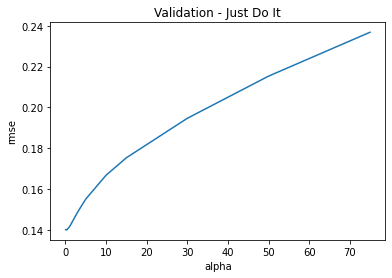

In [138]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

Text(0, 0.5, 'rmse')

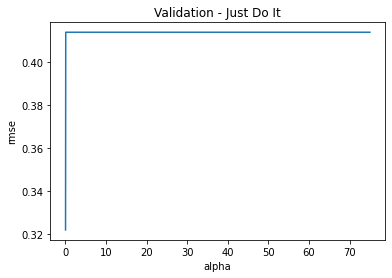

In [139]:
cv_lasso = pd.Series(cv_lasso, index = alphas)
cv_lasso.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

Chcked how the alpha value is changing in lasso selected featires (code from https://www.kaggle.com/apapiu/regularized-linear-models), it seems like my data is performing differently. Pretty much because of the feature engineering in my earlier notebook. I think it is possible that some of the models (because of the feature scaling etc, will not perform good on this data. 

In the last resort I could take a look again at the data before the feature engineering part. But I think that, I'd probably do better, to check out different datasets and resources and not banging my head through this wall :) Some fresh data air would also be appreciated. 